<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

In [1]:
from matplotlib import pyplot as plt
import numpy as np

### 1.1 Random numbers from the Normal distribution

In [2]:
np.random.normal(loc=5, scale=2, size=10) #location is the mean, scale is the standard deviation, size is the number of random numbers we want

array([ 7.11321604,  7.43575419,  8.27877784,  3.12040699,  7.40752639,
        4.64461054, 11.27418021,  5.93507021,  4.02922878,  4.741342  ])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

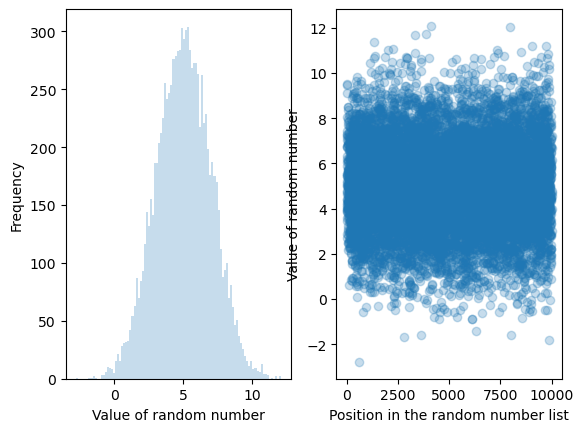

In [3]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [4]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)
mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)
print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.47%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [5]:
import numpy.random as rnd

### 1.2 The simulation

In [6]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

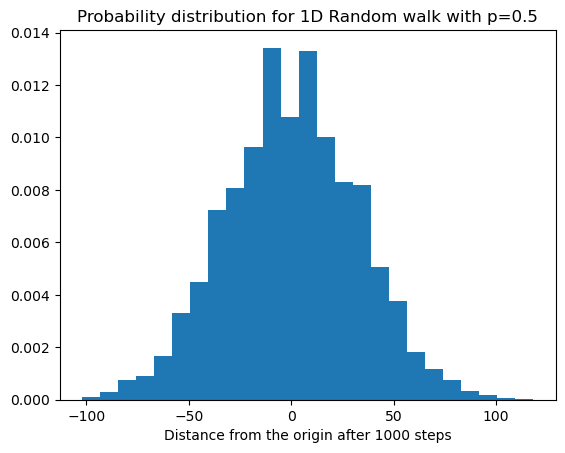

In [7]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

In [8]:
def brown_1d(prob_right=.7, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

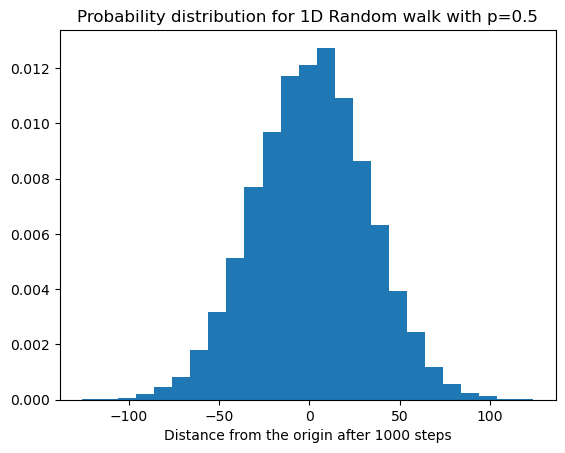

In [9]:
#probability 0.7 to right
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

## 2 Estimating \(\pi\)

### 2.1 The method

In [10]:

# Your code here


### 2.2 A poor but intuitive solution

In [11]:
N_total = 100_000
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.14484

### 2.3 A better solution

In [12]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)    
4 * (N_green / N_total)

3.141312

### 2.4 A smarter solution

In [13]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.138908

## Exercise 1 :  Vital Stats of Random π

In [14]:
import numpy.random as rnd

In [15]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)
    pi=4 * (N_green / n)
    return pi
    
number_list = [estimate_pi(n=1000) for i in range(100)]
print(f'The mean is {np.mean(number_list)}')
print(f'The standard deviation is {np.std(number_list)}')

The mean is 3.1416000000000004
The standard deviation is 0.059625497901485074


In [16]:
array_list=[10**1, 10**2, 10**3, 10**4, 10**5]
means = []
std = []
for i in array_list:
    number_list = [estimate_pi(n=i) for j in range(100)]
    means.append(np.mean(number_list))
    std.append(np.std(number_list))
    

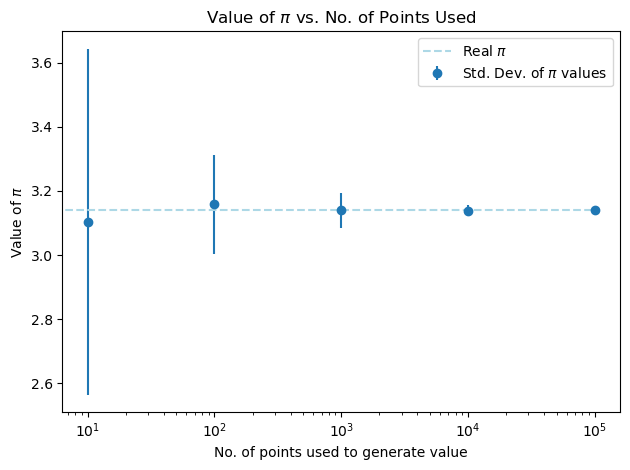

In [31]:
fig,ax=plt.subplots(ncols=1,nrows=1)
ax.errorbar(array_list, means, yerr=std, label='Std. Dev. of $\pi$ values', fmt='o')
ax.hlines(np.pi, 0,10**5, ls='--', color='lightblue', label='Real $\pi$')
plt.legend(loc='upper right')
ax.set_title('Value of $\pi$ vs. No. of Points Used')
ax.set_xlabel('No. of points used to generate value')
ax.set_ylabel('Value of $\pi$')
ax.set_xticks(ticks=array_list, labels=array_list)
plt.xscale('log')
plt.tight_layout()


In [24]:
[str(a) for a in array_list]

['10', '100', '1000', '10000', '100000']